In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import numpy as np
import os


In [4]:
# Dataset directory
train_dir = "C:\\Users\\VICTUS\\miniAI\\dataset\\train"
val_dir = "C:\\Users\\VICTUS\\miniAI\\dataset\\val"
test_dir = "C:\\Users\\VICTUS\\miniAI\\dataset\\test"

# Model parameters
num_classes = 7  # Specify the number of classes in your dataset
input_shape = (224, 224, 3)  # Input shape expected by MobileNetV3


# Training parameters
batch_size = 32
epochs = 5
learning_rate = 0.001

In [5]:
# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=12,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=12,
    class_mode='categorical'
)


Found 4200 images belonging to 7 classes.
Found 840 images belonging to 7 classes.


In [6]:
# Load pre-trained MobileNetV3-Large model
base_model = tf.keras.applications.MobileNetV3Large(weights='imagenet', include_top=False, input_shape=input_shape)

# Add GlobalAveragePooling2D layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add Dense layer for classification (adjust units based on your number of classes)
predictions = Dense(num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(lr=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


12683000/12683000 [==============================] - 3s 0us/step


c:\Users\VICTUS\anaconda3\envs\pro\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
import tensorflow as tf

# Print GPU devices
physical_devices = tf.config.list_physical_devices('GPU')
print("Available GPU devices:", physical_devices)


Available GPU devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Epoch 1/50
350/350 [==============================] - ETA: 0s - loss: 0.7866 - accuracy: 0.7360
Epoch 1: val_accuracy improved from -inf to 0.14286, saving model to best_model_mobilenetv3.h5
350/350 [==============================] - 55s 127ms/step - loss: 0.7866 - accuracy: 0.7360 - val_loss: 3.6599 - val_accuracy: 0.1429
Epoch 2/50
350/350 [==============================] - ETA: 0s - loss: 0.5166 - accuracy: 0.8226
Epoch 2: val_accuracy did not improve from 0.14286
350/350 [==============================] - 45s 129ms/step - loss: 0.5166 - accuracy: 0.8226 - val_loss: 2.1357 - val_accuracy: 0.1357
Epoch 3/50
350/350 [==============================] - ETA: 0s - loss: 0.4182 - accuracy: 0.8633
Epoch 3: val_accuracy improved from 0.14286 to 0.14524, saving model to best_model_mobilenetv3.h5
350/350 [==============================] - 47s 133ms/step - loss: 0.4182 - accuracy: 0.8633 - val_loss: 3.8004 - val_accuracy: 0.1452
Epoch 4/50
350/350 [==============================] - ETA: 0s - lo

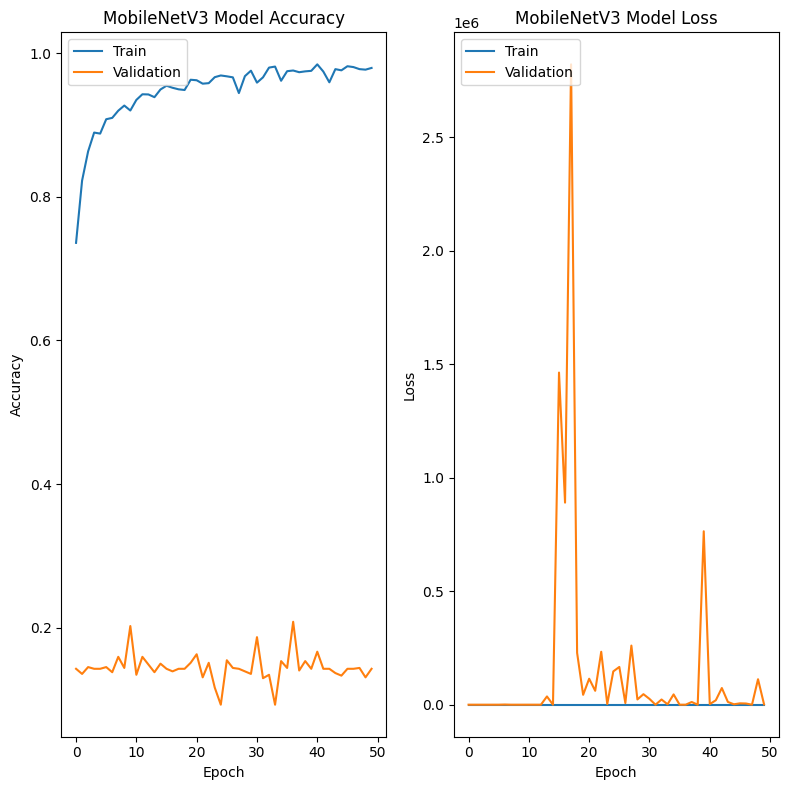

In [8]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
checkpoint = ModelCheckpoint('best_model_mobilenetv3.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
tensorboard = TensorBoard(log_dir='./logs_mobilenetv3', histogram_freq=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,  # Replace `epochs` with an integer, e.g., 30
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, tensorboard]
)
# Plot training & validation accuracy values
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Found 4200 images belonging to 7 classes.
132/132 [==============================] - 15s 106ms/step


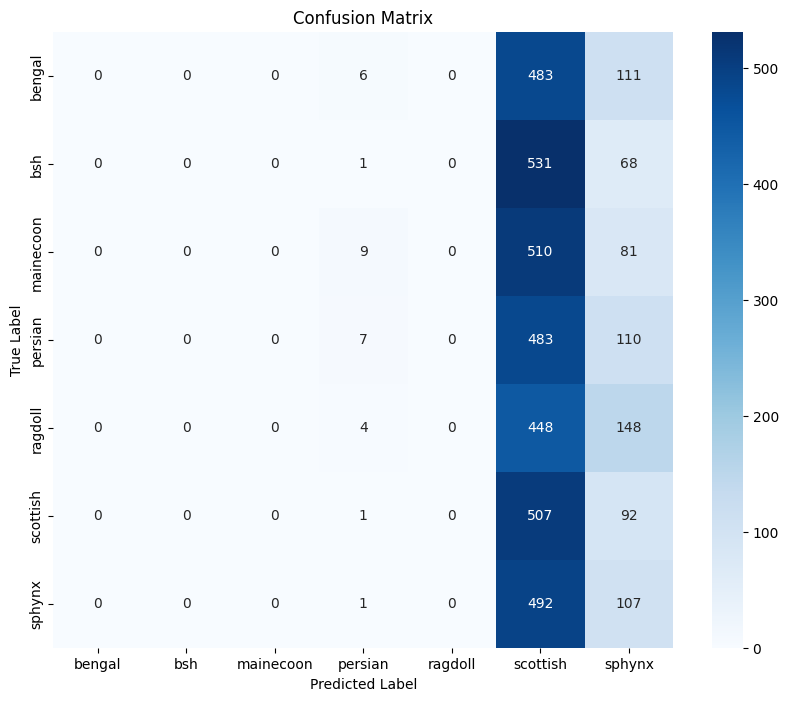

              precision    recall  f1-score   support

      bengal       0.00      0.00      0.00       600
         bsh       0.00      0.00      0.00       600
   mainecoon       0.00      0.00      0.00       600
     persian       0.24      0.01      0.02       600
     ragdoll       0.00      0.00      0.00       600
    scottish       0.15      0.84      0.25       600
      sphynx       0.15      0.18      0.16       600

    accuracy                           0.15      4200
   macro avg       0.08      0.15      0.06      4200
weighted avg       0.08      0.15      0.06      4200



c:\Users\VICTUS\anaconda3\envs\pro\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\anaconda3\envs\pro\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\VICTUS\anaconda3\envs\pro\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming dataset directories are defined
test_dir = "C:\\Users\\VICTUS\\miniAI\\dataset\\train"

# Load the best model
model = tf.keras.models.load_model('best_model_mobilenetv3.h5')

# Create test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(320, 320),
    batch_size=32,  # Adjust if needed
    class_mode='categorical',
    shuffle=False
)

# Get true labels and class indices
true_classes = test_generator.classes
class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())

# Get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


Found 420 images belonging to 7 classes.


14/14 [==============================] - 2s 94ms/step


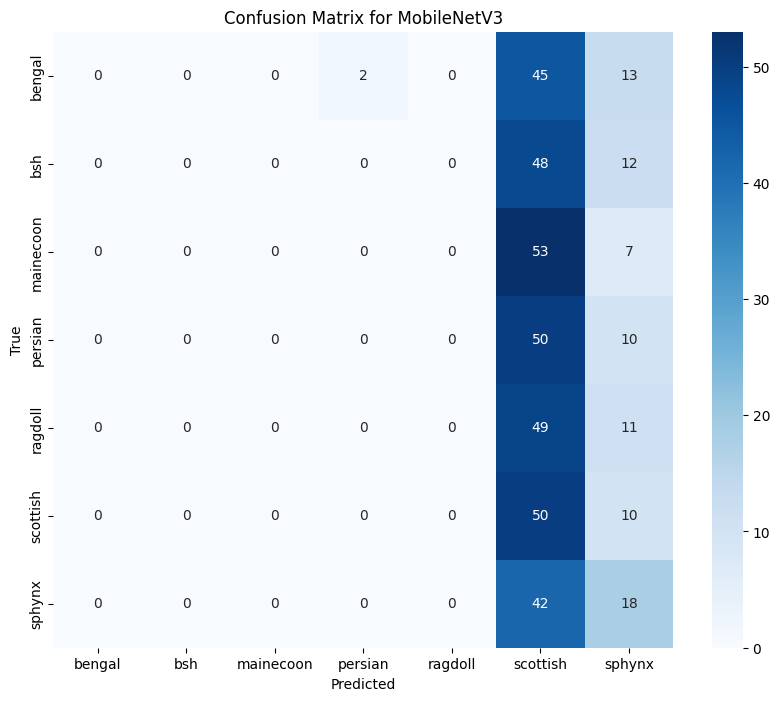

Classification Report for MobileNetV3
              precision    recall  f1-score   support

      bengal       0.00      0.00      0.00        60
         bsh       0.00      0.00      0.00        60
   mainecoon       0.00      0.00      0.00        60
     persian       0.00      0.00      0.00        60
     ragdoll       0.00      0.00      0.00        60
    scottish       0.15      0.83      0.25        60
      sphynx       0.22      0.30      0.26        60

    accuracy                           0.16       420
   macro avg       0.05      0.16      0.07       420
weighted avg       0.05      0.16      0.07       420



In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Setup data (ensure these paths are correct and match your directory structure)
base_dir = 'C:\\Users\\VICTUS\\miniAI\\dataset'
test_dir = os.path.join(base_dir, 'test')
img_height, img_width = 320, 320
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(img_height, img_width), 
    batch_size=batch_size, 
    class_mode='categorical', 
    shuffle=False
)

# Load the trained model (ensure this path is correct)
mobilenetv3_model = tf.keras.models.load_model('best_model_mobilenetv3.h5')

# Predict using the loaded model
y_pred_mobilenetv3 = mobilenetv3_model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels_mobilenetv3 = np.argmax(y_pred_mobilenetv3, axis=1)

# Plotting confusion matrices
classes = list(test_generator.class_indices.keys())  # Use the class names from the dataset

plot_confusion_matrix(y_true, y_pred_labels_mobilenetv3, classes, 'MobileNetV3')

# Print the classification report
print('Classification Report for MobileNetV3')
print(classification_report(y_true, y_pred_labels_mobilenetv3, target_names=classes, zero_division=0))




Found 4200 images belonging to 7 classes.
Found 840 images belonging to 7 classes.
Found 420 images belonging to 7 classes.
4334752/4334752 [==============================] - 1s 0us/step
Epoch 1/50
132/132 [==============================] - ETA: 0s - loss: 0.6197 - accuracy: 0.7845
Epoch 1: val_accuracy improved from -inf to 0.77143, saving model to best_mobilenetv3_small_model.h5
132/132 [==============================] - 17s 108ms/step - loss: 0.6197 - accuracy: 0.7845 - val_loss: 0.6880 - val_accuracy: 0.7714
Epoch 2/50
132/132 [==============================] - ETA: 0s - loss: 0.3859 - accuracy: 0.8662
Epoch 2: val_accuracy improved from 0.77143 to 0.77976, saving model to best_mobilenetv3_small_model.h5
132/132 [==============================] - 12s 88ms/step - loss: 0.3859 - accuracy: 0.8662 - val_loss: 0.6481 - val_accuracy: 0.7798
Epoch 3/50
132/132 [==============================] - ETA: 0s - loss: 0.3134 - accuracy: 0.8936
Epoch 3: val_accuracy improved from 0.77976 to 0.8154

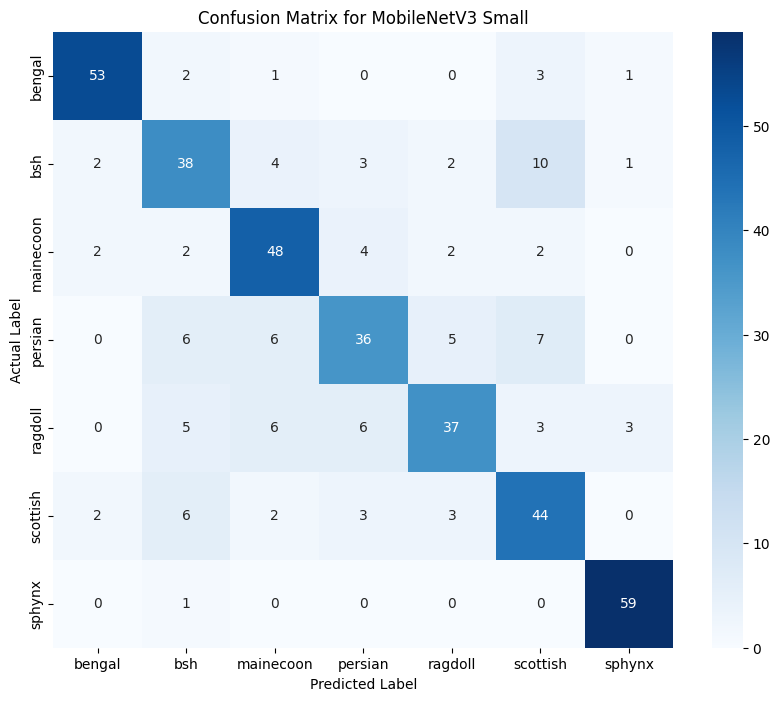

Classification Report for MobileNetV3 Small
              precision    recall  f1-score   support

      bengal       0.90      0.88      0.89        60
         bsh       0.63      0.63      0.63        60
   mainecoon       0.72      0.80      0.76        60
     persian       0.69      0.60      0.64        60
     ragdoll       0.76      0.62      0.68        60
    scottish       0.64      0.73      0.68        60
      sphynx       0.92      0.98      0.95        60

    accuracy                           0.75       420
   macro avg       0.75      0.75      0.75       420
weighted avg       0.75      0.75      0.75       420



In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Large, MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt

# Define image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Define paths
base_dir = 'C:\\Users\\VICTUS\\miniAI\\dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Data generators with preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV3 Small model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_mobilenetv3_small_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
tensorboard = TensorBoard(log_dir='./logs_mobilenetv3_small', histogram_freq=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, tensorboard]
)

# Load the best model
model = tf.keras.models.load_model('best_mobilenetv3_small_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Small')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Small')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys(),zero_division=0))


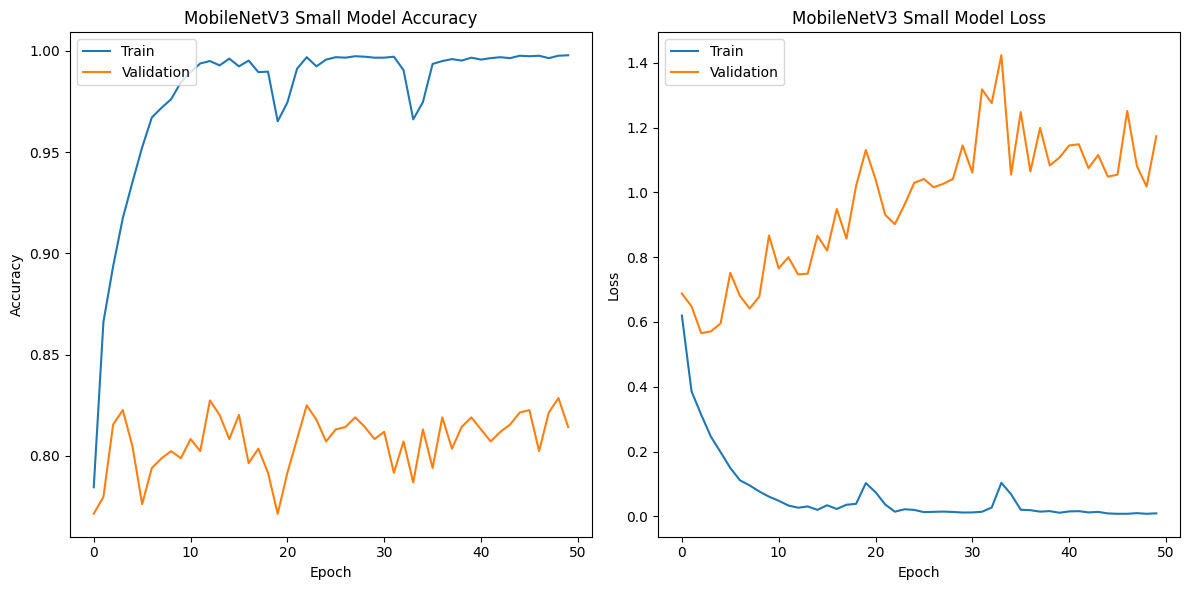

In [12]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Small Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Small Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Found 4200 images belonging to 7 classes.
Found 840 images belonging to 7 classes.
Found 420 images belonging to 7 classes.
Epoch 1/50
132/132 [==============================] - ETA: 0s - loss: 0.8703 - accuracy: 0.6895
Epoch 1: val_accuracy improved from -inf to 0.78929, saving model to best_mobilenetv3_small_model.h5
132/132 [==============================] - 42s 294ms/step - loss: 0.8703 - accuracy: 0.6895 - val_loss: 0.6150 - val_accuracy: 0.7893
Epoch 2/50
132/132 [==============================] - ETA: 0s - loss: 0.6213 - accuracy: 0.7774
Epoch 2: val_accuracy improved from 0.78929 to 0.81429, saving model to best_mobilenetv3_small_model.h5
132/132 [==============================] - 37s 278ms/step - loss: 0.6213 - accuracy: 0.7774 - val_loss: 0.5446 - val_accuracy: 0.8143
Epoch 3/50
132/132 [==============================] - ETA: 0s - loss: 0.5798 - accuracy: 0.7988
Epoch 3: val_accuracy did not improve from 0.81429
132/132 [==============================] - 36s 276ms/step - loss

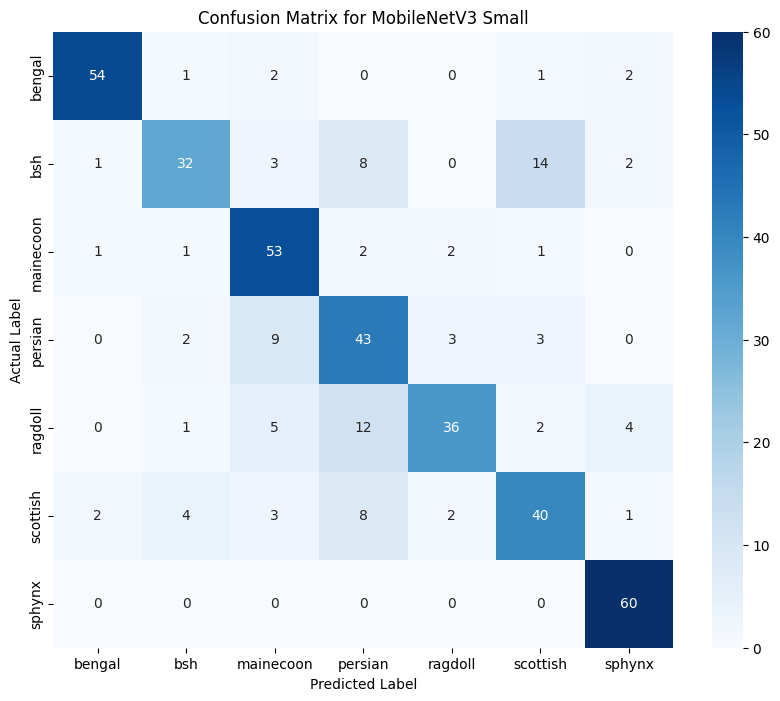

Classification Report for MobileNetV3 Small
              precision    recall  f1-score   support

      bengal       0.93      0.90      0.92        60
         bsh       0.78      0.53      0.63        60
   mainecoon       0.71      0.88      0.79        60
     persian       0.59      0.72      0.65        60
     ragdoll       0.84      0.60      0.70        60
    scottish       0.66      0.67      0.66        60
      sphynx       0.87      1.00      0.93        60

    accuracy                           0.76       420
   macro avg       0.77      0.76      0.75       420
weighted avg       0.77      0.76      0.75       420



In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, average_precision_score
import matplotlib.pyplot as plt

# Define image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Define paths
base_dir = 'C:\\Users\\VICTUS\\miniAI\\dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Data generators with augmentation and preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Load the MobileNetV3 Small model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_mobilenetv3_small_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
tensorboard = TensorBoard(log_dir='./logs_mobilenetv3_small', histogram_freq=1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[checkpoint, tensorboard, early_stopping]
)

# Load the best model
model = tf.keras.models.load_model('best_mobilenetv3_small_model.h5')

# Predict using the loaded model
y_pred = model.predict(test_generator)
y_true = test_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)

# Accuracy and mAP calculation
accuracy = accuracy_score(y_true, y_pred_labels)
mean_ap = average_precision_score(tf.keras.utils.to_categorical(y_true), y_pred)

print(f"Accuracy: {accuracy}")
print(f"mAP: {mean_ap}")

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix for MobileNetV3 Small')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print the classification report
print('Classification Report for MobileNetV3 Small')
print(classification_report(y_true, y_pred_labels, target_names=test_generator.class_indices.keys()))


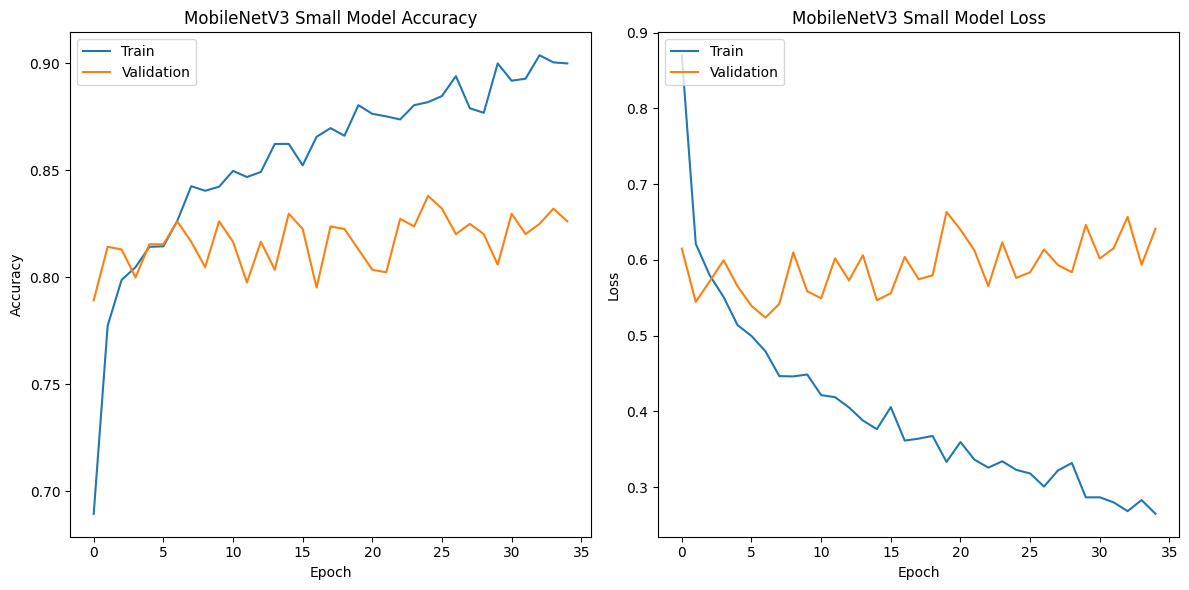

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MobileNetV3 Small Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MobileNetV3 Small Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
